# 朴素贝叶斯 Naive Bayes
## 算法实现 implementation of algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

### 数据集 Dataset

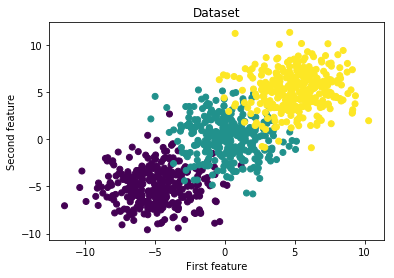

In [2]:
centers = [(-5, -5), (0, 0), (5, 5)]
X, y = make_blobs(n_samples=1000, n_features=2, cluster_std=2, centers=centers, shuffle=False, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [3]:
from collections import defaultdict
class GaussianNaiveBayes():
    def __init__(self):
        self.mean = None
        self.std = None
        self.probs = None

    def train(self, X_train, y_train):
        # classify by target
        sub_datasets = defaultdict(lambda: [])
        cls_cnt = defaultdict(lambda: 0)
        for doc_vect, c in zip(X_train, y_train):
            sub_datasets[c].append(doc_vect)
            cls_cnt[c] += 1
        # probability
        probs = {k: v/len(y_train) for k, v in cls_cnt.items()}
        # mean & std
        mean = {k: np.mean(v, axis=0) for k, v in sub_datasets.items()}
        std = {k: np.std(v, axis=0) for k, v in sub_datasets.items()}
        self.mean = mean
        self.std = std
        self.probs = probs
        return mean, std, probs

    def p_x_given_y(self, X, mean_y, variance_y):
        # Create a function that calculates p(x | y):
        # Input the arguments into a probability density function
        p = 1/(np.sqrt(2*np.pi*variance_y)) * np.exp((-(X-mean_y)**2)/(2*variance_y))
        return p

    def predict(self, X_test):
        # likelihood
        likelihood = {k: np.dot(np.product(self.p_x_given_y(X_test, self.mean[k], self.std[k]), axis=1), self.probs[k])
                      for k in self.probs.keys()}

        n = 0
        map_dict = {}
        likelihoodarray = np.array([])
        for k, v in likelihood.items():
            map_dict[n] = k
            likelihoodarray = np.concatenate((likelihoodarray, v), axis=0)
            n += 1
        likelihoodarray.shape = (n, -1)

        class_id = np.argmax(likelihoodarray, axis=0)
        return np.array([map_dict[k] for k in class_id])

    def predict_log(self, X_test):
        # likelihood
        likelihood = {k: np.log(np.sum(self.p_x_given_y(X_test, self.mean[k], self.std[k]), axis=1) + self.probs[k])
                      for k in self.probs.keys()}

        n = 0
        map_dict = {}
        likelihoodarray = np.array([])
        for k, v in likelihood.items():
            map_dict[n] = k
            likelihoodarray = np.concatenate((likelihoodarray, v), axis=0)
            n += 1
        likelihoodarray.shape = (n, -1)

        class_id = np.argmax(likelihoodarray, axis=0)
        return np.array([map_dict[k] for k in class_id])
    
    def score(self, X_test, y_test):
        y_predict = self.predict(X_test)
        return np.mean(np.where(y_predict == y_test, 1, 0))

### 测试 Testing

In [4]:
clf = GaussianNaiveBayes()
clf.train(X_train, y_train)
clf.score(X_test, y_test)

0.952

### 预测可视化 Visualize Result

In [5]:
def plot_decision_boundary(clf, X): 
    # Plotting decision regions
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    Z =  np.array(clf.predict(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    from matplotlib.colors import ListedColormap
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    plt.contourf(xx, yy, Z, cmap=cmap_light)

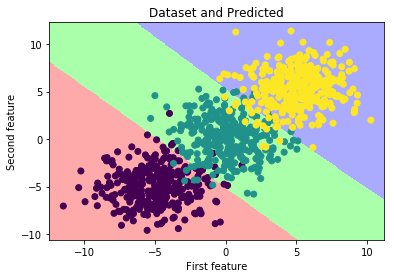

In [6]:
plot_decision_boundary(clf,X)
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset and Predicted")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

## scikit-learn

In [7]:
from sklearn.naive_bayes import GaussianNB

In [8]:
gau_clf = GaussianNB()
gau_clf.fit(X_train, y_train)
gau_clf.score(X_test,y_test)

0.952

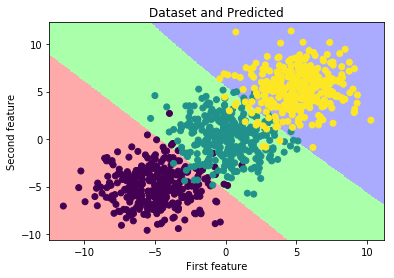

In [9]:
plot_decision_boundary(gau_clf,X)
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset and Predicted")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()